In [26]:
#importing file and getting the data
#data set to lowercase to reduce the number of words/character in vocabulary.
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io

path = get_file(
    'nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
with io.open(path, encoding='utf-8') as f:
    text = f.read().lower()
print('Length of corpus:', len(text))



Length of corpus: 600893


In [2]:
#Storing all the distinct characters occurring in the text in the chars variable and map each of the characters into it’s corresponding location in the vocabulary
chars = sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))



total chars: 57


In [5]:
# splitting the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))



nb sequences: 200285


In [11]:
#vectorizing the data
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Vectorization...


In [15]:
# model with one LSTM and dense layer and softmax activation
print('Build model...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)








Build model...


In [16]:
    # helper function to sample an index from a probability array
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
   
    # Function invoked at end of each epoch to prints generated text.

def end_of_epoch(epoch, _):
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

In [17]:
#Training the model
print_callback = LambdaCallback(on_epoch_end=end_of_epoch)

history = model.fit(x, y,validation_split=0.33,
          batch_size=128,
          epochs=10,
          callbacks=[print_callback])

Train on 134190 samples, validate on 66095 samples
Epoch 1/10
134190/134190 [==============================] - 117s 873us/step - loss: 2.1269 - val_loss: 1.8864

----- Generating text after Epoch: 0
----- diversity: 0.2
----- Generating with seed: "nowadays that a gentle, sober, retiring "
nowadays that a gentle, sober, retiring of the prase of the present of the present and the prase of the present and the prasent of the present of the prase of the prase of the prase of the present the prase of the prase of the speriation of the prase of the speriation of the present to the prase of the prase of the prasion of the preserter the prase of the prase of the present and the prase of the prasined the pristion of the prase of t
----- diversity: 0.5
----- Generating with seed: "nowadays that a gentle, sober, retiring "
nowadays that a gentle, sober, retiring and sersest of the one of experions of the senseled the obtertions and in the exprosse to baso one stan whole reach is the sensent deard

ugh to flutter its young wings), there wishevers to constinct of
the whole
has age
refinitled.

2diess of came obbidstly different, as empottly vidious viciate," understang after dewise, catters of the indeveriam of the such ascated
inleing,
defeciences in such difficult to whonking schopenhapled, or without questions, in the consoltit at a mirtty in the personives, with itself, back pard is you
vold person torchy which sad by relisate 
----- diversity: 1.2
----- Generating with seed: "ugh to flutter its young wings), there w"
ugh to flutter its young wings), there was prebok propen oflroudage to doors out abcaiss "good-et his "most timenes
with mosaje
at even time even at
stainte--pud imulaties of dwates apother wis: how how
press to speat "must abot only
hot. it -pice though
and bang ligron instluss at propers has awer for  knone. as, has people is most philosophy as right, we frvent is,-fade.. the expensina! is not certain.

ruere: centuary--and of eavely 
Epoch 5/10
134190/134190 [

logical fact of an acture of the superficial in the sense of the fings the sense of the out of the good and the sensation of the superiors, and the most subtle, and and and and subtle, and and have the sense of the possible and probably distrust, and the conception of the future of the english of the most spirit and delight of the sense and and about himself in the sensation of the most probably of the futu
----- diversity: 0.5
----- Generating with seed: "liest inward prompting of the
logical fa"
liest inward prompting of the
logical faith in the art, thereby all supersigers to the enjoyment of
a lovers, in the connerable with a philosophers, and the power in the most command; and as a greater would be free these german and the deception of the bearing of the sight of the mans of with the superiors of the cause of the reading the instinct
of such of a mistakes one have not and in the
spirit and sense of the refineming that it is
----- diversity: 1.0
----- Generating with seed: "liest 

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


s, that importunity how to be the
unforble truting, not estuly, and how of the nobilitained.ur.

assore of the good satisfave
any one' macringgo and charn of a
my frenchms are
constradly he
----- diversity: 1.2
----- Generating with seed: "d. as formerly in his states of discoura"
d. as formerly in his states of discourarity
find orcable may be sturoding mituals-indlababousts, from leave--apport of flood , swker the silenceed of tumed as latern, doughte filemunaccul natural "spirit sportine is a
extrueasy, sought men. doopy and displeator, it alt and oblign. how
kani, possiblessnoy, fintical beaus"--whis 
tulntwill,
not the cleace also, interfard reflance and de
framoured athanoble on want of the
powpear the ruit


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               95232     
_________________________________________________________________
dense_2 (Dense)              (None, 57)                7353      
Total params: 102,585
Trainable params: 102,585
Non-trainable params: 0
_________________________________________________________________


dict_keys(['val_loss', 'loss'])


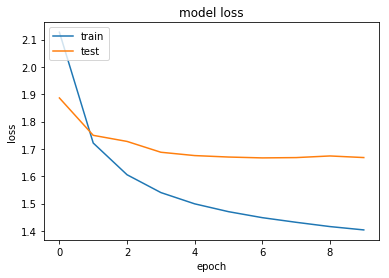

In [20]:
# list all data in history
import matplotlib.pyplot as plt
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
#function for generating the text of varied length and diversity
def generate_text(length, diversity):
    # Get random starting text
    start_index = random.randint(0, len(text) - maxlen - 1)
    generated = ''
    sentence = text[start_index: start_index + maxlen]
    generated += sentence
    for i in range(length):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char
    return generated

In [25]:
print(generate_text(500, 0.5))

 and in it, counting besides the educations and offert problem of the properly in a principally and fact that the case they have to soul the hearts in the truerous free philosophers and contrary and respect of my uncertain is severity of the present of the sacrifices of an artist--caused "we are the respect of the englist
in the good and the not the
stame will and the complace in phant with the "man" as a man to his case and fings his good man in the honed may perhaps that the realmance, and at the religious and and which
has all man 
